In [6]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [7]:
%matplotlib inline

In [8]:
!del gdp.db

C:\Users\al_mu\GitHub\World-Development-Indicators-GDP\gdp.db


The process cannot access the file because it is being used by another process.


In [9]:
conn = sqlite3.connect('gdp.db') # create connection
cur = conn.cursor() # create cursor

In [10]:
# create dataframe from gdp
# 1. countries
# 2. gdp
df_countries = pd.read_excel('data/gdp.xls', sheet_name='Metadata - Countries')
df_gdp = pd.read_excel('data/gdp.xls', sheet_name='Data', header=3 , index_col='Country Name')

In [11]:
df_countries.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [12]:
# select the columns we need from the original table
countries = df_countries[['Country Code','Region','IncomeGroup','TableName']]

In [13]:
countries.head()

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra


In [14]:
# rename the columns names
countries.rename(columns={"Country Code": "Country_code", "IncomeGroup": "Income_group" , "TableName" : "Country_Name"},inplace=True)

C:\Users\al_mu\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
countries.head()

,Country_code,Region,Income_group,Country_Name
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra


In [16]:
countries.Income_group

0              High income
1               Low income
2      Lower middle income
3      Upper middle income
4              High income
              ...         
258    Upper middle income
259             Low income
260    Upper middle income
261    Lower middle income
262    Lower middle income
Name: Income_group, Length: 263, dtype: object

In [17]:
# change the 'Income_group' to category
countries.Income_group = pd.Categorical(countries.Income_group)

C:\Users\al_mu\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
# change the 'Income_group' to category numbers
countries.Income_group = countries.Income_group.cat.codes

In [19]:
countries.head()

,Country_code,Region,Income_group,Country_Name
0,ABW,Latin America & Caribbean,0,Aruba
1,AFG,South Asia,1,Afghanistan
2,AGO,Sub-Saharan Africa,2,Angola
3,ALB,Europe & Central Asia,3,Albania
4,AND,Europe & Central Asia,0,Andorra


In [20]:
countries.describe()

,Income_group
count,263.000000
mean,0.954373
std,1.434914
min,-1.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [21]:
# create countries table in database
cur.execute("create table countries (country_code varchar,region varchar,income_group int , Country_Name varchar)")

In [22]:
# using pandas to write the countries table
countries.to_sql('countries', conn, if_exists='append', index = False)

In [23]:
# using pandas to read the countries table
pd.read_sql('select * from countries', conn)

,country_code,region,income_group,Country_Name
0,ABW,Latin America & Caribbean,0,Aruba
1,AFG,South Asia,1,Afghanistan
2,AGO,Sub-Saharan Africa,2,Angola
3,ALB,Europe & Central Asia,3,Albania
4,AND,Europe & Central Asia,0,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,3,Kosovo
259,YEM,Middle East & North Africa,1,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,3,South Africa
261,ZMB,Sub-Saharan Africa,2,Zambia


In [24]:
# cleaning the region data
pd.read_sql('select region,count(*) from countries group by 1 ', conn)

,region,count(*)
0,None,46
1,East Asia & Pacific,37
2,Europe & Central Asia,58
3,Latin America & Caribbean,42
4,Middle East & North Africa,21
5,North America,3
6,South Asia,8
7,Sub-Saharan Africa,48


In [25]:
pd.read_sql("select * from countries where region is null", conn)

,country_code,region,income_group,Country_Name
0,ARB,None,-1,Arab World
1,CEB,None,-1,Central Europe and the Baltics
2,CSS,None,-1,Caribbean small states
3,EAP,None,-1,East Asia & Pacific (excluding high income)
4,EAR,None,-1,Early-demographic dividend
5,EAS,None,-1,East Asia & Pacific
6,ECA,None,-1,Europe & Central Asia (excluding high income)
7,ECS,None,-1,Europe & Central Asia
8,EMU,None,-1,Euro area
9,EUU,None,-1,European Union


In [26]:
# delete the unnecessary data
cur.execute('delete from countries where region is null')

In [27]:
cur.execute('commit;')

In [28]:
pd.read_sql("select count(*) from countries ", conn)

,count(*)
0,217


In [29]:
pd.read_sql('select region,count(*) from countries group by 1 ', conn)

,region,count(*)
0,East Asia & Pacific,37
1,Europe & Central Asia,58
2,Latin America & Caribbean,42
3,Middle East & North Africa,21
4,North America,3
5,South Asia,8
6,Sub-Saharan Africa,48


In [30]:
df_gdp.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN
Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN
Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN
Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN
Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN


In [31]:
# normalise and changing from wide to longe 
gdb_n = pd.wide_to_long(df_gdp, [""], i="Country Code", j="year")

In [32]:
gdb_n

,,Indicator Name,Indicator Code,
Country Code,year,,,
ABW,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
AFG,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
AGO,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
ALB,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
AND,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
...,...,...,...,...
XKX,2020,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
YEM,2020,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
ZAF,2020,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN


In [33]:
gdb_n.reset_index(inplace=True)

In [34]:
gdb_n.head()

,Country Code,year,Indicator Name,Indicator Code,
0,ABW,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
1,AFG,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
2,AGO,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
3,ALB,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN
4,AND,1960,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN


In [35]:
# choosing the columns we need from the orignal table
gdp_x = gdb_n[['Country Code','year','']]
gdp_x

,Country Code,year,
0,ABW,1960,NaN
1,AFG,1960,NaN
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN
...,...,...,...
16099,XKX,2020,NaN
16100,YEM,2020,NaN
16101,ZAF,2020,NaN
16102,ZMB,2020,NaN


In [36]:
# rename the columns to understandable name
gdp_x.rename(columns={"Country Code": "Country_code", "": "GDP"},inplace=True)

C:\Users\al_mu\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
gdp_x

,Country_code,year,GDP
0,ABW,1960,NaN
1,AFG,1960,NaN
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN
...,...,...,...
16099,XKX,2020,NaN
16100,YEM,2020,NaN
16101,ZAF,2020,NaN
16102,ZMB,2020,NaN


In [38]:
# create gdp table in database
cur.execute("create table gdp(country_code varchar,year date,GDP integer)")
conn.commit()

In [39]:
# using pandas to write the gdp table
gdp_x.to_sql('gdp', conn, if_exists='append', index = False)

In [40]:
pd.read_sql('select * from gdp', conn)

,country_code,year,GDP
0,ABW,1960,NaN
1,AFG,1960,NaN
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN
...,...,...,...
16099,XKX,2020,NaN
16100,YEM,2020,NaN
16101,ZAF,2020,NaN
16102,ZMB,2020,NaN


In [41]:
# top 10 performing counties in 2019
pd.read_sql(''' select * 
                from gdp g
                join countries as c 
                on g.country_code = c.country_code
                where year = 2019 
                order by GDP DESC 
                limit 10''', conn)

,country_code,year,GDP,country_code,region,income_group,Country_Name
0,USA,2019,1.827317e+13,USA,North America,0,United States
1,CHN,2019,1.153716e+13,CHN,East Asia & Pacific,3,China
2,JPN,2019,6.210698e+12,JPN,East Asia & Pacific,0,Japan
3,DEU,2019,3.959451e+12,DEU,Europe & Central Asia,0,Germany
4,FRA,2019,2.971919e+12,FRA,Europe & Central Asia,0,France
5,IND,2019,2.963952e+12,IND,South Asia,2,India
6,GBR,2019,2.919891e+12,GBR,Europe & Central Asia,0,United Kingdom
7,BRA,2019,2.347238e+12,BRA,Latin America & Caribbean,3,Brazil
8,ITA,2019,2.147422e+12,ITA,Europe & Central Asia,0,Italy
9,CAN,2019,1.939183e+12,CAN,North America,0,Canada


In [42]:
# total GDP for each region
pd.read_sql('''select  region , sum(GDP) as total_gdp_region 
                from gdp as g 
                join countries as c 
                on g.country_code = c.country_code 
                where year = 2019 
                GROUP BY region 
                order by total_gdp_region desc''', conn)

,region,total_gdp_region
0,Europe & Central Asia,2.444584e+13
1,East Asia & Pacific,2.431919e+13
2,North America,2.021236e+13
3,Latin America & Caribbean,5.656813e+12
4,South Asia,3.568796e+12
5,Middle East & North Africa,2.895223e+12
6,Sub-Saharan Africa,1.835286e+12


In [43]:
pd.read_sql('''select  region , Country_Name , GDP
                from gdp as g 
                join countries as c 
                on g.country_code = c.country_code
                where year = 2019''', conn)

,region,Country_Name,GDP
0,Latin America & Caribbean,Aruba,NaN
1,South Asia,Afghanistan,2.173959e+10
2,Sub-Saharan Africa,Angola,9.876968e+10
3,Europe & Central Asia,Albania,1.486852e+10
4,Europe & Central Asia,Andorra,3.539838e+09
...,...,...,...
212,Europe & Central Asia,Kosovo,8.006622e+09
213,Middle East & North Africa,"Yemen, Rep.",NaN
214,Sub-Saharan Africa,South Africa,4.301669e+11
215,Sub-Saharan Africa,Zambia,2.961601e+10


In [56]:
# find the top gdp country in each region in 2019
pd.read_sql("""
select * from (
select region, country_name, round(gdp/1000000) gdp, rank() over (partition by region order by gdp desc) number
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where year = 2019 
) where number = 1
""" , conn)

,region,country_name,gdp,number
0,East Asia & Pacific,China,11537160.0,1
1,Europe & Central Asia,Germany,3959451.0,1
2,Latin America & Caribbean,Brazil,2347238.0,1
3,Middle East & North Africa,Saudi Arabia,703950.0,1
4,North America,United States,18273172.0,1
5,South Asia,India,2963952.0,1
6,Sub-Saharan Africa,Nigeria,479674.0,1


In [45]:
# for a given region, who is top country in every year
pd.read_sql("""
select region , year , country_name , round(gdp/1000000) gdp
from (
select region , year , country_name , gdp , dense_rank() over (partition by region,year order by gdp desc) top_country
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where region = 'East Asia & Pacific' and year <> 2020
)where top_country = 1
""" , conn)

,region,year,country_name,gdp
0,East Asia & Pacific,1960,Japan,796213.0
1,East Asia & Pacific,1961,Japan,892105.0
2,East Asia & Pacific,1962,Japan,971583.0
3,East Asia & Pacific,1963,Japan,1053911.0
4,East Asia & Pacific,1964,Japan,1176973.0
5,East Asia & Pacific,1965,Japan,1245470.0
6,East Asia & Pacific,1966,Japan,1377970.0
7,East Asia & Pacific,1967,Japan,1530679.0
8,East Asia & Pacific,1968,Japan,1727868.0
9,East Asia & Pacific,1969,Japan,1943469.0


In [46]:
pd.read_sql("""
select region , year , country_name , round(gdp/1000000) gdp
from (
select region , year , country_name , gdp , dense_rank() over (partition by region,year order by gdp desc) top_country
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where region = 'Latin America & Caribbean' and year <> 2020
)where top_country = 1
""" , conn)

,region,year,country_name,gdp
0,Latin America & Caribbean,1960,Brazil,246662.0
1,Latin America & Caribbean,1961,Brazil,272009.0
2,Latin America & Caribbean,1962,Brazil,286197.0
3,Latin America & Caribbean,1963,Brazil,288700.0
4,Latin America & Caribbean,1964,Brazil,298763.0
5,Latin America & Caribbean,1965,Brazil,307886.0
6,Latin America & Caribbean,1966,Brazil,320664.0
7,Latin America & Caribbean,1967,Brazil,336425.0
8,Latin America & Caribbean,1968,Brazil,374870.0
9,Latin America & Caribbean,1969,Brazil,411366.0


In [47]:
pd.read_sql("""
select region , year , country_name , round(gdp/1000000) gdp
from (
select region , year , country_name , gdp , dense_rank() over (partition by region,year order by gdp desc) top_country
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where region = 'South Asia' and year <> 2020
)where top_country = 1
""" , conn)

,region,year,country_name,gdp
0,South Asia,1960,India,148773.0
1,South Asia,1961,India,154312.0
2,South Asia,1962,India,158835.0
3,South Asia,1963,India,168356.0
4,South Asia,1964,India,180903.0
5,South Asia,1965,India,176135.0
6,South Asia,1966,India,176038.0
7,South Asia,1967,India,189814.0
8,South Asia,1968,India,196245.0
9,South Asia,1969,India,209079.0


In [48]:
pd.read_sql("""
select region , year , country_name , round(gdp/1000000) gdp
from (
select region , year , country_name , gdp , dense_rank() over (partition by region,year order by gdp desc) top_country
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where region = 'Sub-Saharan Africa' and year <> 2020
)where top_country = 1
""" , conn)

,region,year,country_name,gdp
0,Sub-Saharan Africa,1960,South Africa,79071.0
1,Sub-Saharan Africa,1961,South Africa,82111.0
2,Sub-Saharan Africa,1962,South Africa,87184.0
3,Sub-Saharan Africa,1963,South Africa,93612.0
4,Sub-Saharan Africa,1964,South Africa,101045.0
5,Sub-Saharan Africa,1965,South Africa,107232.0
6,Sub-Saharan Africa,1966,South Africa,111991.0
7,Sub-Saharan Africa,1967,South Africa,120051.0
8,Sub-Saharan Africa,1968,South Africa,125037.0
9,Sub-Saharan Africa,1969,South Africa,130933.0


In [49]:
pd.read_sql("""
select region , year , country_name , round(gdp/1000000) gdp
from (
select region , year , country_name , gdp , dense_rank() over (partition by region,year order by gdp desc) top_country
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where region = 'Europe & Central Asia' and year <> 2020
)where top_country = 1
""" , conn)

,region,year,country_name,gdp
0,Europe & Central Asia,1960,United Kingdom,730143.0
1,Europe & Central Asia,1961,United Kingdom,749690.0
2,Europe & Central Asia,1962,United Kingdom,757958.0
3,Europe & Central Asia,1963,United Kingdom,794904.0
4,Europe & Central Asia,1964,United Kingdom,838891.0
5,Europe & Central Asia,1965,United Kingdom,856862.0
6,Europe & Central Asia,1966,United Kingdom,870341.0
7,Europe & Central Asia,1967,United Kingdom,894593.0
8,Europe & Central Asia,1968,United Kingdom,943269.0
9,Europe & Central Asia,1969,France,978576.0


In [50]:
pd.read_sql("""
select region , year , country_name , round(gdp/1000000) gdp
from (
select region , year , country_name , gdp , dense_rank() over (partition by region,year order by gdp desc) top_country
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where region = 'Middle East & North Africa' and year <> 2020
)where top_country = 1
""" , conn)

,region,year,country_name,gdp
0,Middle East & North Africa,1960,"Iran, Islamic Rep.",65260.0
1,Middle East & North Africa,1961,"Iran, Islamic Rep.",72750.0
2,Middle East & North Africa,1962,"Iran, Islamic Rep.",79000.0
3,Middle East & North Africa,1963,"Iran, Islamic Rep.",84747.0
4,Middle East & North Africa,1964,"Iran, Islamic Rep.",92538.0
5,Middle East & North Africa,1965,"Iran, Islamic Rep.",108471.0
6,Middle East & North Africa,1966,"Iran, Islamic Rep.",120663.0
7,Middle East & North Africa,1967,"Iran, Islamic Rep.",134700.0
8,Middle East & North Africa,1968,"Iran, Islamic Rep.",154646.0
9,Middle East & North Africa,1969,"Iran, Islamic Rep.",179906.0


In [51]:
pd.read_sql("""
select region , year , country_name , round(gdp/1000000) gdp
from (
select region , year , country_name , gdp , dense_rank() over (partition by region,year order by gdp desc) top_country
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where region = 'North America' and year <> 2020
)where top_country = 1
""" , conn)

,region,year,country_name,gdp
0,North America,1960,United States,3173051.0
1,North America,1961,United States,3246031.0
2,North America,1962,United States,3444039.0
3,North America,1963,United States,3595577.0
4,North America,1964,United States,3804120.0
5,North America,1965,United States,4047584.0
6,North America,1966,United States,4310677.0
7,North America,1967,United States,4418444.0
8,North America,1968,United States,4630529.0
9,North America,1969,United States,4774076.0


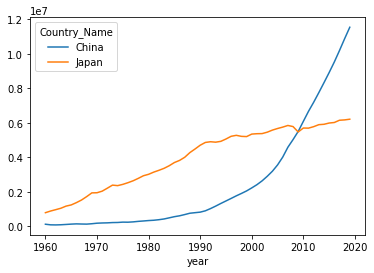

In [52]:
# compare the GDP for Japan and CHaina for the all years 
pd.read_sql("""
select  country_name , year ,  round(gdp/1000000) gdp
from gdp as g 
join countries as c 
on g.country_code = c.country_code
where country_name in ('Japan', 'China') and  year < 2020
""" , conn).pivot(index='year', columns='Country_Name', values='gdp').plot()